Implemente o método de Runge-Kutta de 4ª ordem para calcular a velocidade com que um volante de
badmington atinge 2 s depois de ser largado. A velocidade terminal do volante é de 6.80 m/s, e a aceleração é

$$
a_y(t)=g-\frac{g}{v_T^2}|v_y|v_y
$$

Compare o valor obtido com o valor exato, de acordo com a lei $v_y(t)=v_T tanh(\frac{gt}{v_T})$


In [29]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Variables

v_t = 6.8  # m/s
g = 9.8  # m/s^2

In [31]:
# Time

t_start, t_end = 0, 1.5
dt = 0.001
n = int((t_end - t_start) / dt)

In [32]:
# Formulas


def acceleration_formula(t, v):
    return -g + g / v_t * v * abs(v)

In [33]:
# Initial conditions

r0 = 2
v0 = 0
a0 = -g
t0 = t_start

In [34]:
# Runge-Kutta 4th order

r = np.zeros(n)
v = np.zeros(n)
a = np.zeros(n)
t = np.zeros(n)

r[0] = r0
v[0] = v0
a[0] = a0
t[0] = t0

for i in range(1, n):
    k1 = dt * acceleration_formula(t[i - 1], v[i - 1])
    k2 = dt * acceleration_formula(t[i - 1] + dt / 2, v[i - 1] + k1 / 2)
    k3 = dt * acceleration_formula(t[i - 1] + dt / 2, v[i - 1] + k2 / 2)
    k4 = dt * acceleration_formula(t[i - 1] + dt, v[i - 1] + k3)
    v[i] = v[i - 1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    r[i] = r[i - 1] + v[i - 1] * dt
    t[i] = t[i - 1] + dt

/tmp/ipykernel_380539/672339231.py:5: RuntimeWarning: overflow encountered in double_scalars
  return -g + g / v_t * v * abs(v)


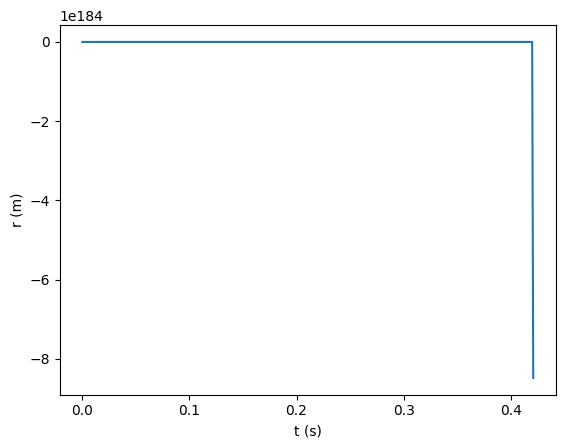

In [35]:
# Graph

plt.plot(t, r)
plt.xlabel("t (s)")
plt.ylabel("r (m)")
plt.show()

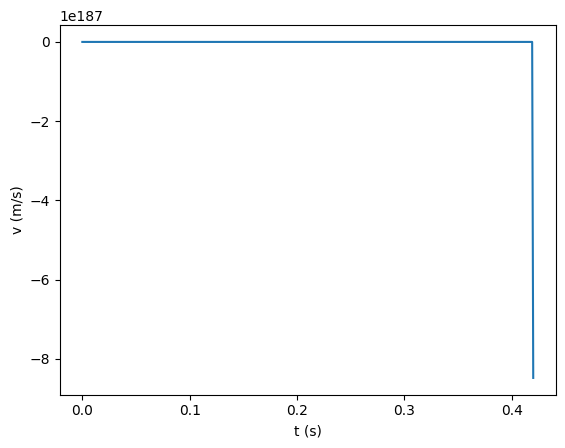

In [36]:
plt.plot(t, v)
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.show()

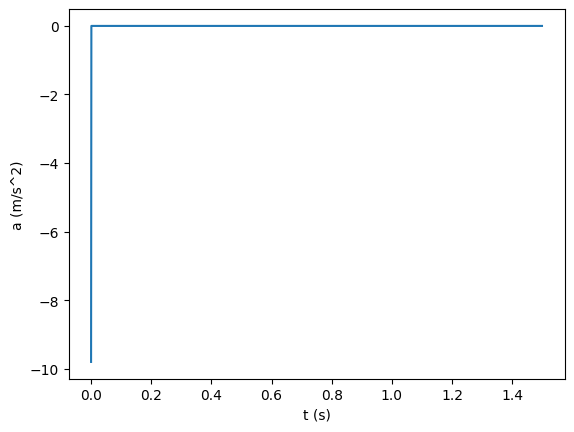

In [37]:
plt.plot(t, a)
plt.xlabel("t (s)")
plt.ylabel("a (m/s^2)")
plt.show()